In [1]:
'''
事件化回测双均线策略
'''
% matplotlib inline
import matplotlib.pyplot as plt
import tushare as ts
import pandas as pd
import numpy as np
from pandas import DataFrame

In [ ]:
'''
课程策略
'''
class DailyResult:
    """每日盈亏结果"""
    def __init__(self):
        """构造函数，初始化成员变量"""
        self.date = ''      # 日期
        self.close = 0      # 当日收盘
        self.change = 0     # 当日涨跌
        self.pos = 0        # 当日持仓
        self.last_pos = 0   # 昨日持仓
        
        self.pnl = 0        # 当日盈亏
        self.fee = 0        # 手续费
        self.net_pnl = 0    # 净盈亏
        
    def calculate(self, date, close, change, pos, last_pos):
        """计算每日盈亏"""
        # 赋值原始数据
        self.date = date
        self.close = close
        self.change = change
        self.pos = pos
        self.last_pos = last_pos
        
        # 计算结果数据
        self.pnl = self.change * self.pos
        self.fee = abs(self.pos-self.last_pos)*self.close* 1.5/10000    # ETF手续费万1.5
        self.net_pnl = self.pnl - self.fee

#code = raw_input('code:')
#date = raw_input('date:')

code = '600380'
date = '2017-01-01'

data = ts.get_hist_data(code, date)
data = data.sort_index()
df = DataFrame()
df['close'] = data['close']
df['change'] = df['close'] - df['close'].shift(1)

# 定义数据缓存结构
close5_array = np.zeros(5)     # MA5缓存数组
close20_array = np.zeros(20)   # MA20缓存数组
pos = 0                        # 当天持仓，初始化为0
last_pos = 0                   # 前一天持仓，初始化为0

dr_list = []                   # 每日盈亏结果列表

# 运行回测
for i, row in enumerate(df.iterrows()):
    
        
    date = row[0]
    close = row[1]['close']
    change = row[1]['change']
    
    # 将数组中的老数据平移一格
    close5_array[0:4] = close5_array[1:5]      
    close20_array[0:19] = close20_array[1:20]
    
    # 将新数据添加到数组末尾
    close5_array[-1] = close              
    close20_array[-1] = close
    
    # 如果尚未有20个数据点的缓存数量，则不执行后续逻辑
    if i < 19:
        continue
    
    # 计算当日持仓盈亏
    dr = DailyResult()
    dr.calculate(date, close, change, pos, last_pos)
    
    # 保存计算结果到列表中
    dr_list.append(dr)
    
    # 根据前一天的ma5和ma20值计算当天持仓
    ma5 = close5_array.mean()
    ma20 = close20_array.mean()
    if ma5 > ma20:
        pos = 10000
    else:
        pos = -10000
        
    # 记录当日的持仓
    last_pos = dr.pos

# 显示回测结果
result_df = pd.DataFrame()

result_df['net_pnl'] = [dr.net_pnl for dr in dr_list]   # 将DailyResult列表中的数据转换为DataFrame格式
result_df.index = [dr.date for dr in dr_list]           # 添加日期索引

result_df['cum_pnl'] = result_df['net_pnl'].cumsum()     # 累积求和
result_df['cum_pnl'].plot()

#result_df

2017-02-07 18.814 18.37 buy
2017-03-09 19.14 19.1835 sell
2017-03-31 18.992 18.9605 buy
2017-04-19 18.854 18.9005 sell
2017-04-28 18.952 18.9045 buy
2017-05-09 18.856 18.861 sell
2017-05-12 18.932 18.8655 buy
2017-06-19 21.674 21.931 sell
2017-06-27 22.238 22.1305 buy
2017-08-14 25.4 25.4955 sell
2017-08-24 25.638 25.6055 buy
2017-09-13 26.446 26.458 sell
2017-10-13 26.032 25.9555 buy


,open,close,action,hold,cash,asset,earn,per_earn
2017-02-06,18.88,18.62,,0,1000000.0,1000000.0,0.0,0.0000
2017-02-07,18.63,18.57,buy,53600,1432.0,1000000.0,0.0,0.0000
2017-02-08,18.55,18.60,,53600,1432.0,995712.0,-4288.0,-0.4288
2017-02-09,18.59,18.73,,53600,1432.0,997856.0,-2144.0,-0.2144
2017-02-10,18.86,18.90,,53600,1432.0,1012328.0,12328.0,1.2328
2017-02-13,18.90,18.97,,53600,1432.0,1014472.0,14472.0,1.4472
2017-02-14,19.00,18.87,,53600,1432.0,1019832.0,19832.0,1.9832
2017-02-15,18.97,19.13,,53600,1432.0,1018224.0,18224.0,1.8224
2017-02-16,19.19,19.14,,53600,1432.0,1030016.0,30016.0,3.0016
2017-02-17,19.19,19.02,,53600,1432.0,1030016.0,30016.0,3.0016


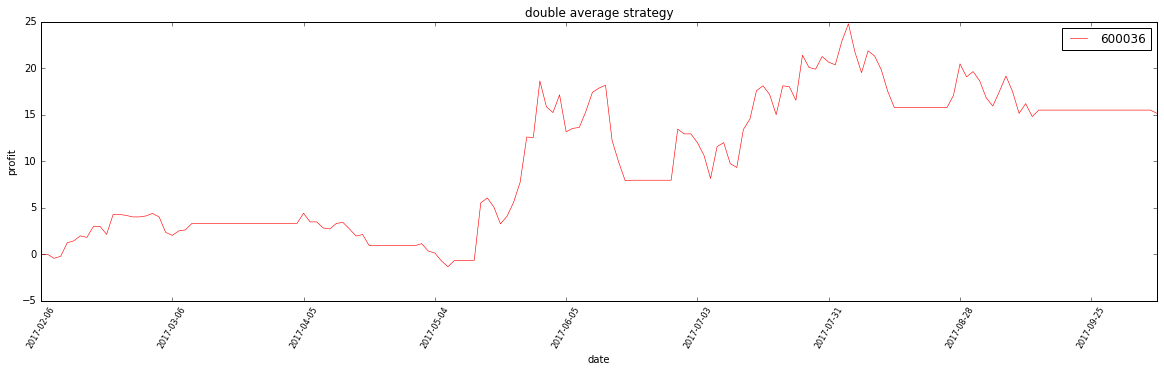

In [16]:
'''
我的策略
双均线策略，每天的交易根据前一天的ma5和ma20交叉情况而定，ma5向上交叉ma20买入，反之卖出，其余时间持仓或者清仓等待下一个交易信号
'''
class DailyResult:
    '''每日盈亏结果'''
    origin_cash = 0
    def __init__(self):
        '''构造函数，初始化成员变量'''
        self.date = ''            # 日期
        self.open_price = 0       # 开盘价
        self.close_price = 0      # 收盘价
        self.action = ''          # 交易信号
        self.hold = 0             # 当日持仓
        self.cash = 0             # 现金
        
        self.asset = 0            # 总资产
        self.earn = 0             # 收益
        self.per_earn = 0         # 收益率
        
    def calculate(self, date, open_price, close_price , action, hold, cash):
        '''计算每日盈亏'''
        # 赋值原始数据
        self.date = date
        self.open_price = open_price
        self.close_price = close_price
        self.action = action
        self.hold = hold
        self.cash = cash
        
        # 计算结果数据
        self.asset = self.hold * self.open_price + self.cash #开盘交易，所以以当天的开盘价计算全部资产
        self.earn = self.asset - self.origin_cash #收益
        self.per_earn = ((self.asset / self.origin_cash) - 1) * 100 #收益率

#输入股票代码 回测开始时间 初始资金
#code = raw_input('code:')
#date = raw_input('date:')
#cash = int(raw_input('cash:'))

code = '600036'
date = '2017-01-01'
cash = 1000000

data = ts.get_hist_data(code, date)
data = data.sort_index()
df = DataFrame()
df['open'] = data['open']
df['close'] = data['close']

# 定义数据缓存结构
close5_array = np.zeros(5)     # MA5缓存数组
close20_array = np.zeros(20)   # MA20缓存数组
last_ma5 = 0                   # 前一天的5日均线
last_ma20 = 0                  # 前一天的20日均线
action = ''

hold = 0                       # 当天持仓，初始化为0
last_hold = 0                  # 前一天持仓，初始化为0

current_cash = cash            #持有现金
last_cash = 0                  #前一天持有现金

dr_list = []                   # 每日盈亏结果列表

DailyResult.origin_cash = cash #初始资金赋值
# 运行回测
for i, row in enumerate(df.iterrows()):
    date = row[0]
    open_price = row[1]['open']
    close_price = row[1]['close']
    
    last_ma5 = close5_array.mean()
    last_ma20 = close20_array.mean()
    
    last_hold = hold
    last_cash = current_cash
    
    action = ''
    if i == 20:
        # 回测的开始，只要ma5在ma20上方，则买入
        if last_ma5 > last_ma20:
            action = 'buy'
    elif i > 20:
        # ma5在ma20上方且当前没有持仓，买入
        if (last_ma5 > last_ma20) & (not(last_hold)):
            action = 'buy'
        # ma5在ma20下方且当前有持仓，卖出
        elif (last_ma5 < last_ma20) & (last_hold != 0):
            action = 'sell'
    
    #新收盘价数据自动从末尾填充，老数据依次丢弃
    close5_array[0:4] = close5_array[1:5]      
    close20_array[0:19] = close20_array[1:20]
    close5_array[-1] = close_price              
    close20_array[-1] = close_price
    
    # 如果尚未有20个数据点的缓存数量，则不执行后续逻辑
    if i < 19:
        continue
    
    # 计算当日持仓盈亏
    if action == 'buy':
        print date, last_ma5, last_ma20, 'buy'
        hold = int(last_cash / open_price)
        hold = hold - hold % 100                     #计算持仓
        current_cash = last_cash - hold * open_price #持仓后剩余的现金
    elif action == 'sell':
        print date, last_ma5, last_ma20, 'sell'
        hold = 0 #清仓
        current_cash = last_cash + last_hold * open_price #计算卖出后的当前持有现金
        
    dr = DailyResult()
    dr.calculate(date, open_price, close_price, action, hold, current_cash)
    
    # 保存计算结果到列表中
    dr_list.append(dr)
    
# 显示回测结果
date_list = [dr.date for dr in dr_list]
columns = ['open', 'close', 'action', 'hold', 'cash', 'asset', 'earn', 'per_earn']
open_price_list = [dr.open_price for dr in dr_list]
close_price_list = [dr.close_price for dr in dr_list]
action = [dr.action for dr in dr_list]
hold = [dr.hold for dr in dr_list]
cash = [dr.cash for dr in dr_list]
asset = [dr.asset for dr in dr_list]
earn = [dr.earn for dr in dr_list]
per_earn = [dr.per_earn for dr in dr_list]

result_df = pd.DataFrame({'open':open_price_list,
                          'close':close_price_list,
                          'action':action,
                          'hold':hold,
                          'cash':cash,
                          'asset':asset,
                          'earn':earn,
                          'per_earn':per_earn}, 
                           index = date_list,
                           columns = columns)

#绘图
plt.rc('figure', figsize = (20, 5)) #全局配置matplot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
result_df['per_earn'].plot(ax = ax,linestyle = '-', linewidth = 0.6, color = 'r', label = code)
ax.set_title('double average strategy') #图标的名称
ax.set_xlabel('date') #x轴名称
ax.set_ylabel('profit') #y轴名称
ax.set_xticklabels(ax.get_xticklabels(), rotation = 60, fontsize = 8) #x轴刻度设置（旋转，字体）
ax.legend(loc = 'best') #显示图例
#fig.savefig('my_stratege.png', dpi = 400, bbox_inches = 'tight') #保存回测结果图表
result_df

In [8]:
a = True
b = 0
if b:
    print 'yes'
else:
    print 'no'


no
